# SYRIATEL CUSTOMER CHURN

## KEY STAKEHOLDERS
1. Executive Leadership Team
2. Customer Retention Department
3. Marketing Team
4. Finance Department
5. Customer Service Team



## PROBLEM STATEMENT

SyriaTel is a telecommunications company that is experiencing significant customer churn, hence hurting their profits. It's getting more expensive to find new customers, and there are already many phone companies competing for the same people. Because of this, retaining existing customers has become very important for the company to stay successful.

**The core business challenge**: SyriaTel needs to identify customers who are likely to churn before they actually leave, enabling proactive retention strategies that are more cost-effective than acquiring new customers.

## BUSINESS UNDERSTANDING

In the highly competitive telecommunications industry, customer churn represents one of the most significant threats to sustainable growth. SyriaTel faces the challenge of maintaining profitability while competing for market share in an increasingly saturated environment.

### Business Value Proposition
By successfully predicting customer churn, SyriaTel can:

1. *Reduce Revenue Loss*: Proactively retain high-value customers before they churn
2. *Optimize Marketing Spend*: Focus acquisition efforts on segments less likely to churn
3. *Improve Customer Experience*: Address service issues before they lead to churn
4. *Enhance Competitive Position*: Build stronger customer relationships through personalized retention strategies
5. *Increase Profitability*: Lower overall customer acquisition costs while improving lifetime value

### Success Criteria

- Primary: Reduce customer churn rate.
- Secondary: Achieve high model accuracy.
- Tertiary: Generate positive ROI.
- Qualitative: Improve customer satisfaction and strengthen brand loyalty

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.tree import plot_tree

In [6]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


In [9]:
# Data loading
df = pd.read_csv('syriatel_data.csv.csv')

# Basic dataset information
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Check for missing values and duplicates
df.isnull().sum()

df.duplicated().sum()

np.int64(0)

In [11]:
# Target variable distribution
churn_counts = df['churn'].value_counts()
churn_rate = df['churn'].mean() * 100

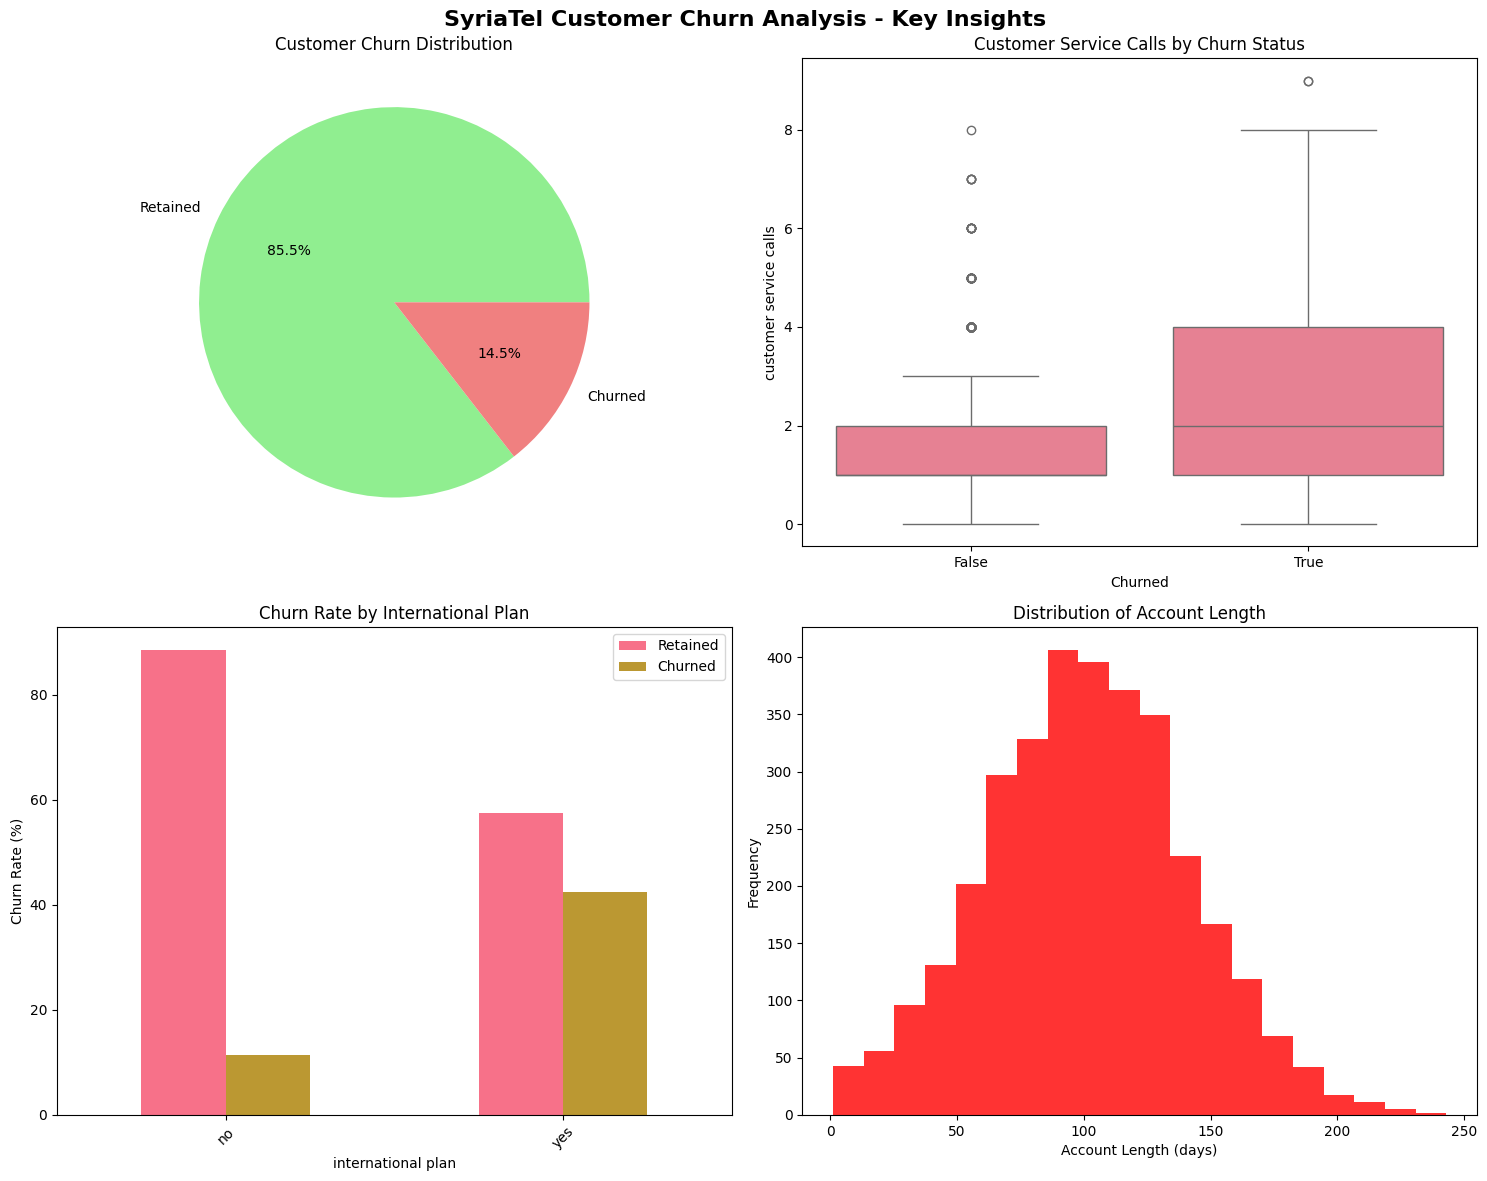

In [26]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SyriaTel Customer Churn Analysis - Key Insights', fontsize=16, fontweight='bold')

# 1. Churn Distribution
churn_counts = df['churn'].value_counts()
axes[0,0].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
              colors=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Customer Churn Distribution')

# 2. Customer Service Calls vs Churn
sns.boxplot(data=df, x='churn', y='customer service calls', ax=axes[0,1])
axes[0,1].set_title('Customer Service Calls by Churn Status')
axes[0,1].set_xlabel('Churned')

# 3. International Plan vs Churn
churn_intl = pd.crosstab(df['international plan'], df['churn'], normalize='index') * 100
churn_intl.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Churn Rate by International Plan')
axes[1,0].set_ylabel('Churn Rate (%)')
axes[1,0].legend(['Retained', 'Churned'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Account Length Distribution
axes[1,1].hist(df['account length'], bins=20, alpha=0.8, color='red')
axes[1,1].set_title('Distribution of Account Length')
axes[1,1].set_xlabel('Account Length (days)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
